# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [17]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
print("Duplicate entries based on Mouse ID and Timepoint:\n", duplicate_mice)

Duplicate entries based on Mouse ID and Timepoint:
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801

In [ ]:
# Optional: Get all the data for the duplicate mouse ID.


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]['Mouse ID'].unique()
print("Mouse IDs with duplicate entries:", duplicate_mice_ids)


Mouse IDs with duplicate entries: ['g989']


In [21]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mice_ids)]

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import pandas as pd

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
# Create a DataFrame with the summary statistics
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})
print(summary_df)
print(summary_df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
import pandas as pd

summary_df = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_df.columns = ['Mean', 'Median', 'Variance', 'Std. Dev.', 'SEM']
summary_df = summary_df.rename_axis("Drug Regimen").reset_index()

print(summary_df)


  Drug Regimen       Mean     Median   Variance  Std. Dev.       SEM
0    Capomulin  40.675741  41.557809  24.947764   4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177   6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684   6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577   8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479   8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083   7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013   6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704   4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562   7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355   6.966589  0.516398


## Bar and Pie Charts

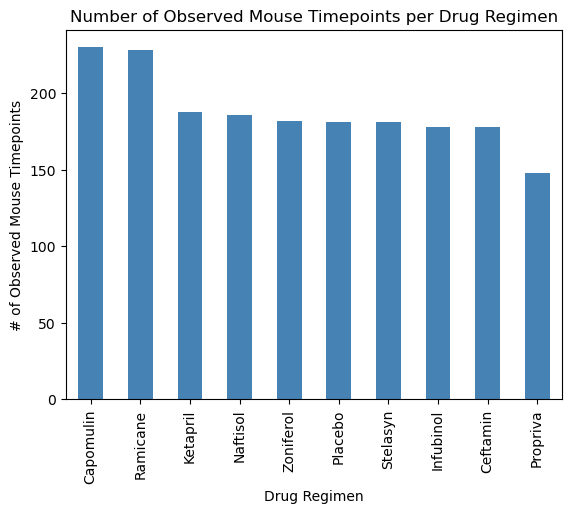

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

import matplotlib.pyplot as plt

regimen_counts.plot(kind='bar', color='steelblue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.show()


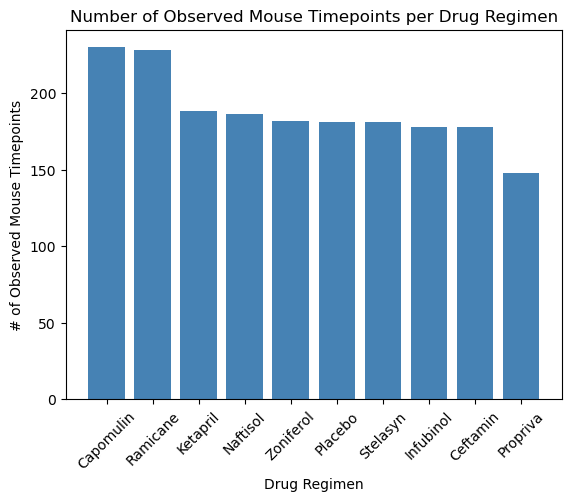

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
import pandas as pd

regimen_counts = cleaned_data['Drug Regimen'].value_counts()


plt.bar(regimen_counts.index, regimen_counts.values, color='steelblue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xticks(rotation=45)
plt.show()


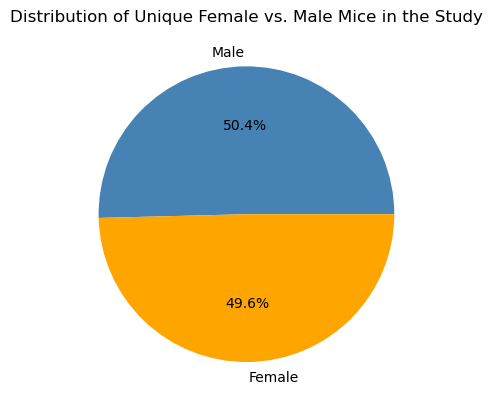

In [26]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
import pandas as pd
import matplotlib.pyplot as plt

unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")


gender_counts = unique_mice['Sex'].value_counts()


plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['steelblue', 'orange'])

plt.title("Distribution of Unique Female vs. Male Mice in the Study")
plt.show()


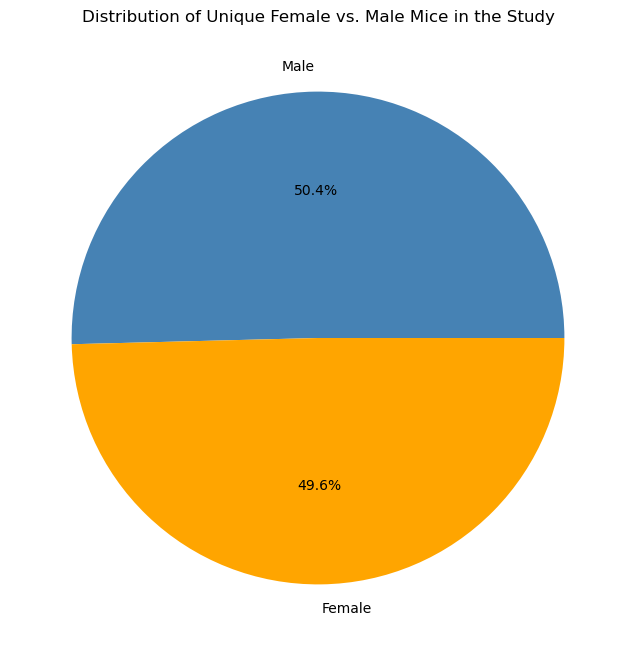

In [27]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
import pandas as pd
import matplotlib.pyplot as plt

unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")

gender_counts = unique_mice['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['steelblue', 'orange'])

plt.title("Distribution of Unique Female vs. Male Mice in the Study")
plt.show()


## Quartiles, Outliers and Boxplots

Capomulin - Q1: 32.37735684, Q3: 40.1592203, IQR: 7.781863460000004
Lower bound: 20.70456164999999, Upper bound: 51.83201549
Outliers for Capomulin: []

Ramicane - Q1: 31.56046955, Q3: 40.65900627, IQR: 9.098536719999998
Lower bound: 17.912664470000003, Upper bound: 54.30681135
Outliers for Ramicane: []

Infubinol - Q1: 54.04860769, Q3: 65.52574285, IQR: 11.477135160000003
Lower bound: 36.83290494999999, Upper bound: 82.74144559000001
Outliers for Infubinol: [36.3213458]

Ceftamin - Q1: 48.72207785, Q3: 64.29983003, IQR: 15.577752179999997
Lower bound: 25.355449580000002, Upper bound: 87.66645829999999
Outliers for Ceftamin: []



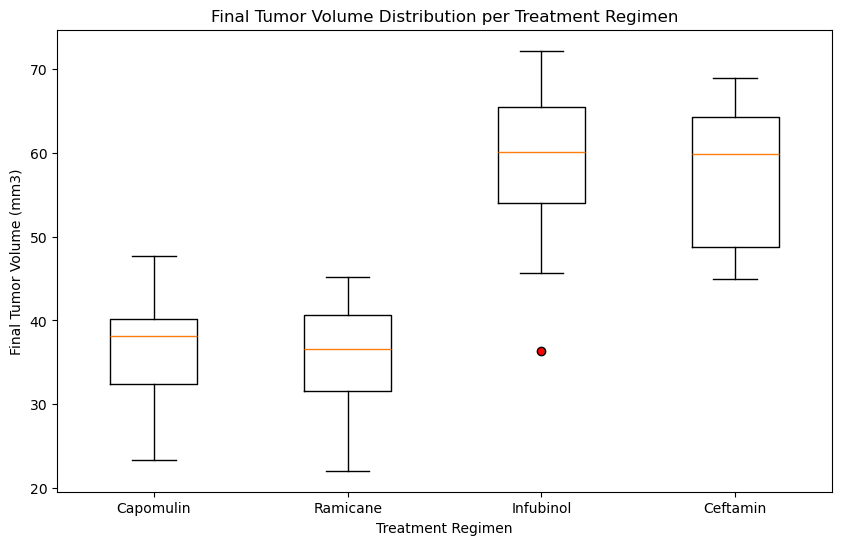

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
last_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume_df = pd.merge(last_timepoint, merged_data, on=['Mouse ID', 'Timepoint'], how='left')
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(selected_treatments)]
# Start by getting the last (greatest) timepoint for each mouse
tumor_volumes = []
for treatment in selected_treatments:
    volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    Q1 = volumes.quantile(0.25)
    Q3 = volumes.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"{treatment} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Outliers for {treatment}: {outliers.tolist()}\n")
    tumor_volumes.append(volumes)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=selected_treatments, flierprops=dict(markerfacecolor='r', marker='o'))
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume Distribution per Treatment Regimen")
plt.show()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


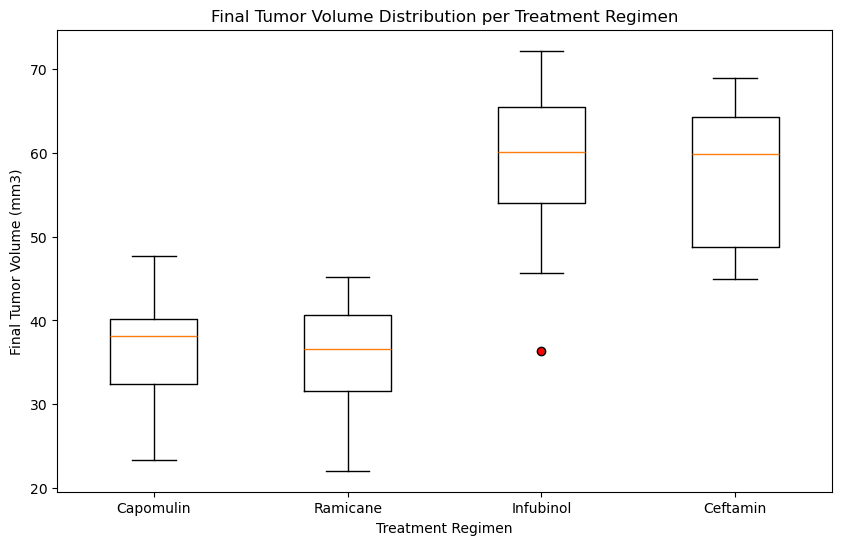

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=selected_treatments, flierprops=dict(markerfacecolor='r', marker='o'))
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume Distribution per Treatment Regimen")
plt.show()

## Line and Scatter Plots

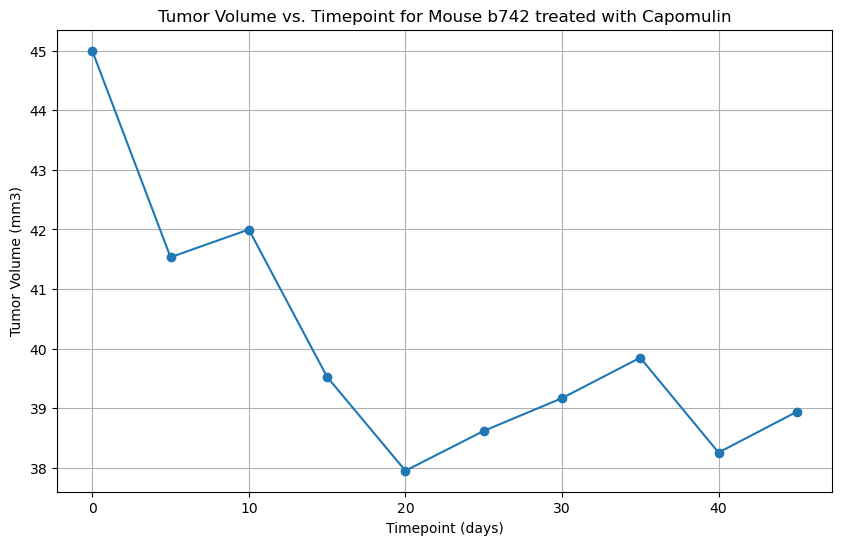

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt
mouse_id = 'b742'
capomulin_mouse_data = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == mouse_id)]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} treated with Capomulin")
plt.grid(True)
plt.show()

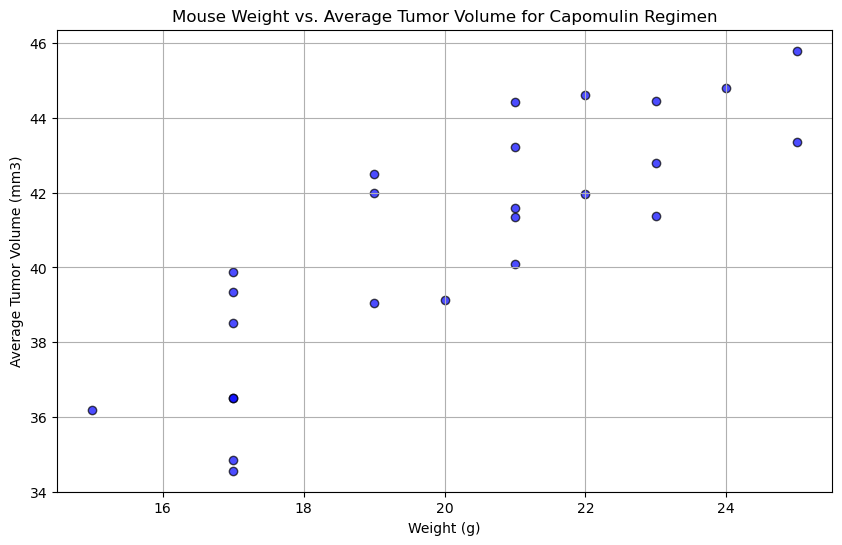

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
capomulin_avg_tumor = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'], c='b', edgecolor='k', alpha=0.7)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


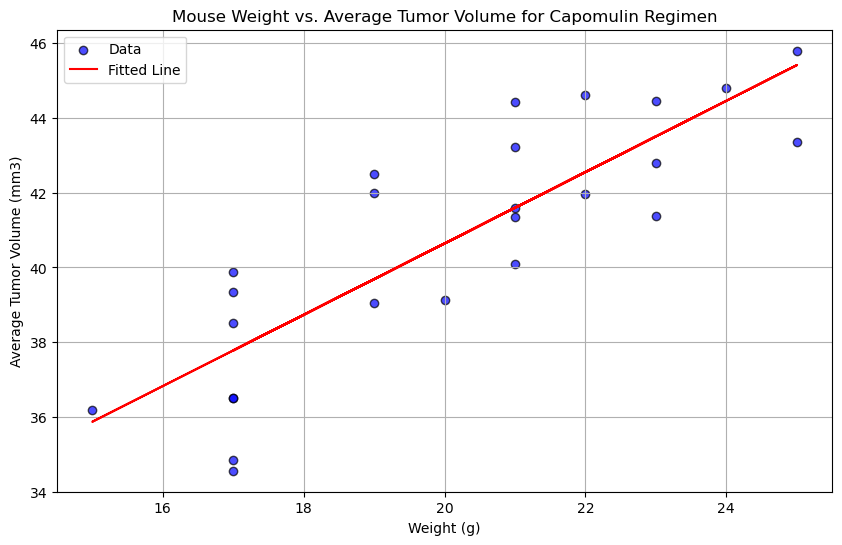

In [36]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
capomulin_avg_tumor = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
weight = capomulin_avg_tumor['Weight (g)']
avg_tumor_volume = capomulin_avg_tumor['Tumor Volume (mm3)']
correlation = weight.corr(avg_tumor_volume)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")
slope, intercept, r_value, p_value, std_err = linregress(weight, avg_tumor_volume)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
plt.figure(figsize=(10, 6))
plt.scatter(weight, avg_tumor_volume, c='b', edgecolor='k', alpha=0.7, label='Data')
plt.plot(weight, slope * weight + intercept, color='r', label='Fitted Line')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.legend()
plt.grid(True)
plt.show()